# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 09 ноября 18:00 Сдача **очная** на онлайн занятии. <br\>


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0920, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[ \sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:
$$w_{new} = w_{old} - ...$$


 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ваше решение здесь***
Предположим, что матрица $X\in R^{NxD}, y \in R^{Nx1}, w \in R^{Dx1}$, где $ N \geq D$.
Выпишем градиент функционала качества.

$$\nabla Q(w) = \nabla (\frac {1}{N} \sum_{i=1}^{N} \left[\langle x_i,w\rangle - y_i\right]^2) = \nabla(\frac{1}{N}(Xw - y)^2) = \nabla\left[\frac{1}{N}(w^Tx^TXw - w^TX^Ty - y^TXw + y^Ty)\right] = \frac{1}{N}(2x^TXw - X^Ty - X^Ty) = \frac{1}{N}(2x^TXw - 2X^Ty)= \frac{2}{N}X^T(Xw -y)$$
$$\nabla R(w) = \nabla \left[ \sum_{j = 1}^{D}w_j^2\right] = 2w$$

В нашей задаче матрица $X$ имеет вид $X = (x_{j_1},.., x_{j_n})^T$, где $x_{j_i} = (x_{j_i1},..,x_{j_iD}), i = 1..n $, индексы объектов мини-батча : $1 \leq j_1\lt .. \lt j_n \leq N, w = (w_1,..,w_D)^T, y = (y_{j_1},..,y_{j_n})^T$

Тогда $Q(w_{old}) = \frac{1}{n}\sum_{i = 1}^{n}(\langle x_{j_i},w_{old}\rangle - y_{j_i} )^2$

В таком случае$$ w_{new} = w_{old} - \alpha \nabla Q(w_{old}) = w_{old} - \alpha\frac{2}{n}\left[\sum_{i=1}^{n}x_{j_i}^T(\langle x_{j_i},w_{old}\rangle - y_{j_i}))\right] - \alpha\frac{2}{C}w_{old}$$
ЗНАЧЕНИЕ ГРАДИЕНТА:
Градиент - линейная комбинация точек из набора с коэффициентами, равными ошибкам алгоритма на соответствущем объекте, усредненная по каждой координате.

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:
$$w_{new} = w_{old} - ...$$


 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Ваше решение здесь***

Предположим, что матрица $X\in R^{NxD}, y \in R^{Nx1}, w \in R^{Dx1}$, где $ N \geq D$.
Выпишем градиент функционала качества.
$$\nabla Q(w) = \nabla\left( -\frac{1}{N}\left[\sum_{i=1}^{N}y_i log(\frac{1}
{1 + exp(-\langle x_i,w\rangle)}) + (1- y_i)log(1 - \frac{1}{1 + exp(-\langle x_i,w\rangle)})\right]\right) =\nabla\left( -\frac{1}{N}\left[\sum_{i=1}^{N}y_i log(\frac{1}
{1 + exp(-\langle x_i,w\rangle)}) + (1- y_i)log(\frac{exp(-\langle x_i,w\rangle)}{1 + exp(-\langle x_i,w\rangle)})\right]\right) $$

Сосчитаем $$ \nabla\left[-y_i log(1+exp(-\langle x_i,w\rangle))\right] = \frac{y_i exp(-\langle x_i,w\rangle)}{1+exp(-\langle x_i,w\rangle)} * x_i^T$$

$$\nabla (1-y_i)log(exp(-\langle x_i,w\rangle)) = (y_i - 1)*x_i^T$$

$$\nabla (1-y_i)log(1+exp(-\langle x_i,w\rangle)) = \frac{(1-y_i)exp(-\langle x_i,w\rangle)}{1+exp(-\langle x_i,w\rangle)}*x_i^T$$

Тогда $$\nabla Q(w) = -\frac{1}{N}\left[\sum_{i=1}^{N}\left[x_i^T(y_i - \frac{1}{1+exp(-\langle x_i,w\rangle)})\right] \right]$$

В рамках нашей задачи матрица $X \in R^{nxD}$ имеет вид $X = (x_{j_1},.., x_{j_n})^T$, где $x_{j_i} = (x_{j_i1},..,x_{j_iD}), i = 1..n $, индексы объектов мини-батча : $1 \leq j_1\lt .. \lt j_n \leq N, w = (w_1,..,w_D)^T, y = (y_{j_1},..,y_{j_n})^T$

В таком случае$$ w_{new} =w_{old} - \alpha \nabla Q(w_{old}) - \alpha \nabla R(w)= w_{old} + \alpha\frac{1}{n}\left[\sum_{i=1}^{n}x_{j_i}^T( y_{j_i} - \sigma(\langle x_{j_i},w_{old}\rangle)\right] - \alpha\frac{2}{C}w_{old} $$

ЗНАЧЕНИЕ ГРАДИЕНТА:
градиент - линейная комбинация объектов выборки с коэффициентами, равными разности математического ожидания случайной величины $\langle x_i,w\rangle$ и истинного значения метки класса объекта, усредненная по количеству оъектов

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?


***Ваше решение здесь***

ГЕССИАН:
Предположим, что матрица $X\in R^{NxD}, y \in R^{Nx1}, w \in R^{Dx1}$, где $ N \geq D$.
Выпишем градиент функционала качества и представим в виде вектора:

$$\nabla Q(w) =  \frac{2}{N}X^T(Xw -y) = \frac{2}{N}\left(\begin {array}{cccc}
 c_1 - \sum_{j=1}^{N}x_{j_1}y_j\\
 c_2 - \sum_{j=1}^{N}x_{j_2}y_j\\
\vdots\\
 c_D - \sum_{j=1}^{N}x_{j_D}y_j
\end{array} \right),
$$ где $c_k = \sum_{i=1}^{N}x_{i_k}\langle x_i,w\rangle, k \in {1,..,D}$

В таком случае Гессиан $H(w)$ равен $H(w) =\frac{2}{N} 
\left(\begin{array}{cccc}
\nabla c_1 \\
\nabla c_2 \\
\vdots\\
\nabla c_D 
\end{array}\right)
,
$ где $\nabla c_k = \left(\sum_{i=1}^{N}x_{i_k}*x_{i_1},..,\sum_{i=1}^{N}x_{i_k}*x_{i_D} \right), k \in {1,..,D} \Rightarrow H(w) = X^TX.$

Поскольку $rg(X) = rg(X^T) = D, rg(X^TX)\geq rg(X^T) + rg(X) - D$ (из свойств ранга матриц) $\Rightarrow rg(X^TX)\geq D,$ но $X^TX \in R^{DxD} \Rightarrow rg(X^TX) \leq D \Rightarrow rg(X^TX) = D \Rightarrow det(H(w))\neq 0 \forall w \in R^{1xD}.$

Если в качестве векторов взять столбцы исходной матрицы, из того, что $rg(X) = D$ следует, что все эти векторы линейно независимы. В таком случае матрица $H(w) = \frac{2}{N}X^TX$ является матрицей грама для данной системы векторов. Поскольку для матрицы грама системы векторов справедливо неравенство $det(H) \geq 0 \Rightarrow$ из него и условия на то, что для нашей матрицы  $det(H(w)) \neq 0 \Rightarrow det(H(w)) \gt 0 \forall w \in R^{1xD}.$ Это и значит, что для нашего функционала качества найденное точное решение $w$ является точкой локального минимума.

ТОЧНОЕ РЕШЕНИЕ ДЛЯ $L2$ РЕГУЛЯРИЗАЦИИ:
$$\nabla Q(w) = \nabla\left(\frac{1}{N}\sum_{i=1}^{N}(\langle x_i,w\rangle-y_i)^2 \right) + \nabla \frac{1}{C} R(w) = $$ {из задания №1 $\nabla \frac{1}{C}R(w) = \frac{2}{C}w $, а так же известен вид $\nabla Q(w) = \frac{2}{N}X^T(Xw - y)$} = $\frac{2}{N}X^T(Xw - y) + \frac{2}{C}w.$

Точное решение находится из уравнения $\nabla Q(w) =0 \Leftrightarrow \frac{2}{N}X^T(Xw - y) + \frac{2}{C}w = 0
\Leftrightarrow\frac{2}{N}X^TXw + \frac{2}{C}w= \frac{2}{N}X^Ty
\Leftrightarrow (\frac{2}{N}X^TX + \frac{2}{C}I)w=X^Ty \Leftrightarrow\quad w = 2(\frac{1}{N}X^TX + \frac{1}{C}I)^{-1}X^Ty$

КАК ПОМОГАЕТ РЕУЛЯРИЗАЦИЯ: в силу линейной зависимости признаков, исходное условие на полный ранг матрицы не будет выполняться, а как следствие, не будет существовать обратная матрица $(X^TX)^{-1}\Rightarrow$ не будет существовать точное решение для задачи минимизации функционала качества. С этой целью применяется регуляризация, при помощи которой матрица, фигурирующая в нахождении точного решения, становится невырожденной.

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Ваше решение здесь***

Обозначим $E(L|x_i) = E, p(y_i=1|x_i) = p, a(x_i)= a, p(y_i=0|x_i) = 1-p(y_i=1|x_i) = 1-p$

Тогда наша задача - минимизировать функционал E как E(p,a).
$$\frac{\partial E(p,a)}{\partial a} = -\frac{p}{(1-a)a} + \frac{1}{1-a} = 0 \Leftrightarrow \frac{a-p}{(1-a)a}=0 \Leftrightarrow a=p$$

Показали, что выполняется необходимое условие экстремума в точке $a=p$. Необходимо показать, что эта точка действительно является точкой локального минимума.
$$ \frac{\partial ^2 E(p,a)}{\partial a^2} = \frac{1}{(1-a)^2} - p\frac{\partial}{\partial a}\left(\frac{1}{a(1-a)}\right) = \frac{1}{(1-a)^2} + \frac{p(1-2a)}{a^2(1-a)^2} = \frac{a^2 + p - 2pa}{a^2(1-a)^2}\Rightarrow \frac{\partial^2 E(p,a)}{\partial a^2}\bigg|_{a=p} =\quad= \frac{p^2 + p - 2p^2}{p^2(1-p)^2} = \frac{p(1-p)}{p^2(1-p)^2} = \frac{1}{p(1-p)} \gt0\Rightarrow$$
значение $$a(x_i) = p(y_i=1|x_i)$$ является точкой локального минимума функции, что и требовалось доказать.

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***

Свободный член нет необходимости регуляризовать, поскольку он отвечает за смещение разделяющей поверхности в пространстве. В отличие от него, другие коэффициенты влияют на наклон этой кривой, из-за чего их необходимо минимизировать по своей величине.

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [9]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [7]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [127]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [4]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [12]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    check_array = np.zeros(X.shape[0])
    check_sum = np.sum(check_array)
    while check_sum < X.shape[0]:
        new_ind = np.asarray(list(i for i in range(0, X.shape[0])))
        if shuffle == True:
            np.random.shuffle(new_ind)
        batch_indices  = np.random.choice(new_ind, size = batch_size, replace = False)
        check_array[batch_indices] = 1
        X_batch = X[batch_indices, :]
        y_batch = y[batch_indices]
        check_sum = np.sum(check_array)
        yield (X_batch, y_batch)

In [13]:
#%%pycodestyle

def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    sigm_value_x = 1/(1+np.exp(-x))
    
    return sigm_value_x


from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg', batch_size = 1, shuffle = True, break_point = 0.5):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.break_point = break_point
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        loss = 0
        y_batch = y_batch.reshape(-1,1)
        if self.model_type == 'lin_reg':
            loss = np.sum(np.power(y_batch - np.dot(X_batch, self.weights),2))
            loss /= X_batch.shape[0]
        elif self.model_type == 'log_reg':
            loss = np.sum((-y_batch + 1) * np.log(1 - sigmoid(np.dot(X_batch, self.weights))) + y_batch*np.log(sigmoid(np.dot(X_batch, self.weights))))
            loss /= -X_batch.shape[0]
        return loss + 1 / self.C * np.sum(np.asarray([0, *(np.ravel(self.weights[1:,:]))]) ** 2)
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        y_batch = y_batch.reshape(-1,1)
        loss_grad = np.zeros(X_batch.shape[1]).reshape(-1, 1)
        if self.model_type == 'lin_reg':
            loss_grad  = X_batch.T.dot(np.dot(X_batch,self.weights) - y_batch)
            loss_grad =  loss_grad * 2 / X_batch.shape[0]
        elif self.model_type == 'log_reg':
            loss_grad = np.dot(X_batch.T, y_batch - sigmoid(np.dot(X_batch, self.weights)))
            loss_grad = -loss_grad / X_batch.shape[0]
        return loss_grad + np.asarray(a = [0, *(np.ravel(self.weights[1:,:]))]).reshape(-1,1) * 2 / self.C
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights = self.weights - self.alpha * new_grad
        pass
    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        # Нужно инициализровать случайно веса
        self.weights = np.random.randn(X.shape[1] + 1, 1)*0.5
        #self.weights = np.ones(X.shape[1] + 1).reshape(-1,1)
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X,y, self.shuffle, self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                X_batch = np.hstack((np.ones(X_batch.shape[0]).reshape(-1,1),X_batch))
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                batch_loss = self.calc_loss(X_batch, y_batch)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                # batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
                
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        X = np.hstack((np.ones(X.shape[0]).reshape(-1,1),X))
        y = np.zeros(X.shape[0])
        np.hstack(X, )
        if self.model_type == 'lin_reg':
            for i in range(0, X.shape[0]):
                res = np.dot(X[i].reshape(1,-1), self.weights)
                if res > self.break_point:
                    y[i] = 1
        elif self.model_type == 'log_reg':
            for i in range(0, X.shape[0]):
                res = np.dot(X[i].reshape(1,-1), self.weights)
                res = sigmoid(res) - self.break_point
                if res > 0:
                    y[i] = 1
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 
        y_hat = y
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [3]:
def plot_decision_boundary(clf, X, y):
    x = np.linspace(-4,8,7)
    y = (- x * clf.weights[1] - clf.weights[0]) / clf.weights[2]
    plt.axis([-5,12,-6,8])
    plt.plot(x, y)
    pass

[[-2.62537645]
 [ 0.69452199]
 [-0.45183252]]
[[-0.09071068]
 [ 0.1388871 ]
 [-0.15129069]]


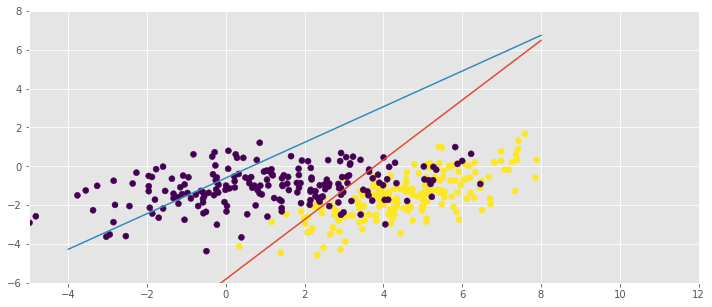

In [163]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]


my_clf = MySGDClassifier(batch_generator, 10, 0.01, 200, 'log_reg', 30, True, 0.5)
my_clf.fit(X,y)
print(my_clf.weights)
plot_decision_boundary(my_clf, X, y)

my_clf = MySGDClassifier(batch_generator, 10, 0.01, 200, 'lin_reg', 30, True, 0.5)
my_clf.fit(X,y)
print(my_clf.weights)
plot_decision_boundary(my_clf, X, y)

plt.scatter(X[:,0], X[:,1], c=y)

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [4]:
from sklearn.datasets import make_classification

In [5]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

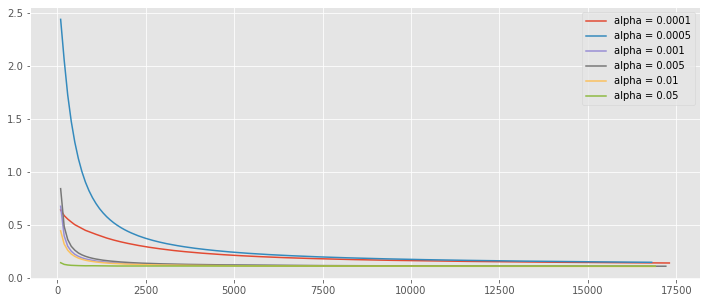

In [169]:
# Lin_reg
alphas = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05]
colors = ["black", "g", "navy", "magenta", "pink", "orange", "red" ]
for i in alphas:
    my_clf = MySGDClassifier(batch_generator, C = 200, alpha = i, max_epoch = 200,
                             model_type = 'lin_reg', batch_size = 30, 
                             shuffle = True, break_point = 0.5)
    my_clf.fit(X,y)
    N = {'num':[],'mean':[]}
    for j in range(100,np.size(my_clf.errors_log['iter']),100):
        N['num'].append(j)
        N['mean'].append(np.mean(my_clf.errors_log['loss'][:j]))
    plt.plot(N['num'],N['mean'],label = "alpha = " + str(i))
plt.legend()


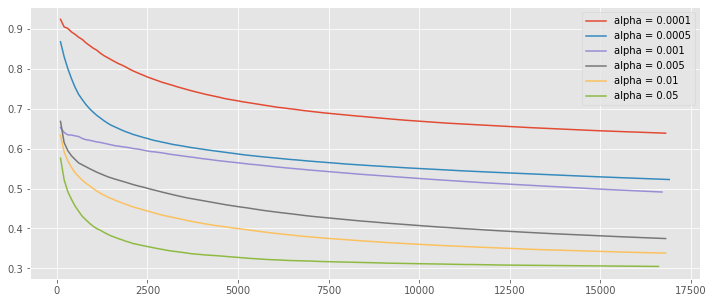

In [111]:
#Log_reg
alphas = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05]
for i in alphas:
    my_clf = MySGDClassifier(batch_generator, C = 200, alpha = i, max_epoch = 200,
                             model_type = 'log_reg', batch_size = 30, 
                             shuffle = True, break_point = 0.5)
    my_clf.fit(X,y)
    N = {'num':[],'mean':[]}
    for j in range(100,np.size(my_clf.errors_log['iter']),100):
        N['num'].append(j)
        N['mean'].append(np.mean(my_clf.errors_log['loss'][:j]))
    plt.plot(N['num'],N['mean'],label = "alpha = " + str(i))
plt.legend()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

/Users/aleksandr/miniconda3/envs/env/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log
/Users/aleksandr/miniconda3/envs/env/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in multiply
/Users/aleksandr/miniconda3/envs/env/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
/Users/aleksandr/miniconda3/envs/env/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in double_scalars
/Users/aleksandr/miniconda3/envs/env/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in square
/Users/aleksandr/miniconda3/envs/env/lib/python3.7/site-packages/ipykernel_launcher.py:77: RuntimeWarning: overflow encountered in true_divide
/Users/aleksandr/miniconda3/envs/env/lib/python3.7/site-packages/ipykernel_launcher.py:84: RuntimeWarning: invalid value encountered in subtract
/User

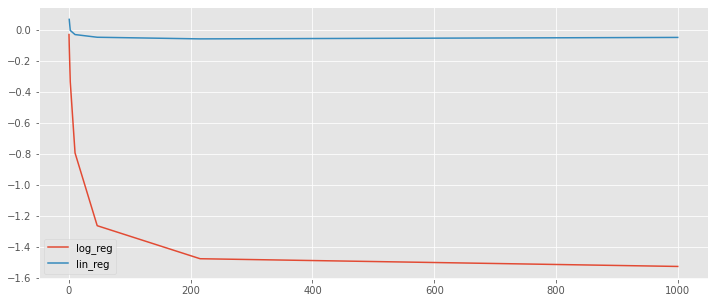

In [172]:
plot_list = {'coeff':[], 'w_mean':[]}
for i in np.logspace(3, -3, 10):
    my_clf = MySGDClassifier(batch_generator, C = i, alpha = 0.05, max_epoch = 100,
                             model_type = 'log_reg', batch_size = 100, 
                             shuffle = True, break_point = 0.5)
    my_clf.fit(X,y)
    plot_list['coeff'].append(i)
    plot_list['w_mean'].append(np.mean(my_clf.weights))
plt.plot(np.logspace(3,-3,10), plot_list['w_mean'], label = "log_reg")
plot_list = {'coeff':[], 'w_mean':[]}

for i in np.logspace(3, -3, 10):
    my_clf = MySGDClassifier(batch_generator, C = i, alpha = 0.05, max_epoch = 100,
                             model_type = 'lin_reg', batch_size = 100, 
                             shuffle = True, break_point = 0.5)
    my_clf.fit(X,y)
    plot_list['coeff'].append(i)
    plot_list['w_mean'].append(np.mean(my_clf.weights))
plt.plot(np.logspace(3,-3,10), plot_list['w_mean'], label = "lin_reg")
plt.legend()

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [34]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [35]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [36]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [9]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [10]:
from sklearn.model_selection import KFold

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [66]:
c = [10,50,100,150,200]
m_type = ['log_reg', 'lin_reg']
epoch = [25,50,75,100]
alphas = [0.001, 0.005, 0.01, 0.05]
str_list  = []
res_list = []
for t in alphas:
    for j in m_type:
        for i in c:
            for k in epoch:
                folds_ind = KFold(n_splits = 3, shuffle = True)
                score = 0
                my_clf = MySGDClassifier(batch_generator, C = i, alpha = t, max_epoch = k,
                                     model_type = j, batch_size = 200, 
                                     shuffle = False, break_point = 0.5)
                for train_index, test_index in folds_ind.split(y_train):
                    X_tr  = X_train[train_index]
                    X_tst  = X_train[test_index]
                    y_tr = y_train[train_index]
                    y_tst  = y_train[test_index]
                    X_tr = (X_tr - np.mean(X_tr, axis = 0)) / np.std(X_tr, axis = 0)
                    my_clf.fit(X_tr, y_tr)
                    print('Fit finished')
                    ret = my_clf.predict(X_tst)
                    score += f1_score(y_tst, ret)
                s = "C = " + str(i) + ",m_type = " + str(j) + ", epoch = "+ str(k) + ",alpha = " + str(t) + "\n"
                print(s + str(score/3))
                str_list.append(s)
                res_list.append(score/3)
print(str_list[np.argmax(np.asarray(res_list))], np.max(np.asarray(res_list)))

Fit finished
Fit finished
Fit finished
C = 10,m_type = log_reg, epoch = 25,alpha = 0.001
0.5008325508308048
Fit finished
Fit finished
Fit finished
C = 10,m_type = log_reg, epoch = 50,alpha = 0.001
0.5075894103702353
Fit finished
Fit finished
Fit finished
C = 10,m_type = log_reg, epoch = 75,alpha = 0.001
0.5089168833808736
Fit finished
Fit finished
Fit finished
C = 10,m_type = log_reg, epoch = 100,alpha = 0.001
0.5094999070213317
Fit finished
Fit finished
Fit finished
C = 50,m_type = log_reg, epoch = 25,alpha = 0.001
0.4987695200483191
Fit finished
Fit finished
Fit finished
C = 50,m_type = log_reg, epoch = 50,alpha = 0.001
0.5039540002966071
Fit finished
Fit finished
Fit finished
C = 50,m_type = log_reg, epoch = 75,alpha = 0.001
0.5100991038114531
Fit finished
Fit finished
Fit finished
C = 50,m_type = log_reg, epoch = 100,alpha = 0.001
0.5079923374966323
Fit finished
Fit finished
Fit finished
C = 100,m_type = log_reg, epoch = 25,alpha = 0.001
0.5012217507254605
Fit finished
Fit finished

KeyboardInterrupt: 

In [75]:
score = 0
folds_ind = KFold(n_splits = 3, shuffle = True)
my_clf = MySGDClassifier(batch_generator, C = 200, alpha = 0.01, max_epoch = 50,
                            model_type = 'log_reg', batch_size = 100, 
                            shuffle = False, break_point = 0.5)
for train_index, test_index in folds_ind.split(y_train):
    X_tr  = X_train[train_index]
    X_tst  = X_train[test_index]
    y_tr = y_train[train_index]
    y_tst  = y_train[test_index]
    X_tr = (X_tr - np.mean(X_tr, axis = 0)) / np.std(X_tr, axis = 0)
    my_clf.fit(X_tr, y_tr)
    print('Fit finished')
    ret = my_clf.predict(X_tst)
    score += f1_score(y_tst, ret)
print(score/3)

Fit finished
Fit finished
Fit finished
0.5134461000827882


Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [68]:
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    #target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title))

X_test = []
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15]    )
X_test = np.array(X_test)
groups_test = np.array(groups_test)
print (X_test.shape, groups_test.shape)

(16627, 15) (16627,)


In [77]:
ret = my_clf.predict(X_test)
fr = {'pair_id':test_data['pair_id'], 'target': ret}
fr  = pd.DataFrame(fr, dtype = int)
fr.to_csv('Prediction.csv', index  = False)

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***